# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

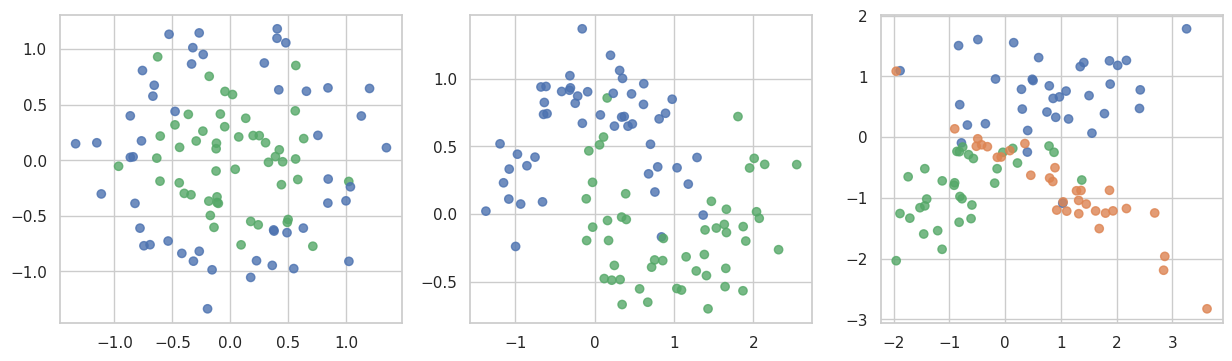

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(ax, clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=2, w_pad=2, pad=2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.figure(figsize=(14, 8), dpi=80)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    #ax.set_title(info)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
train_data = []
test_data = []
for X,y in datasets:
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    train_data.append((x_train, y_train))
    test_data.append((x_test, y_test))

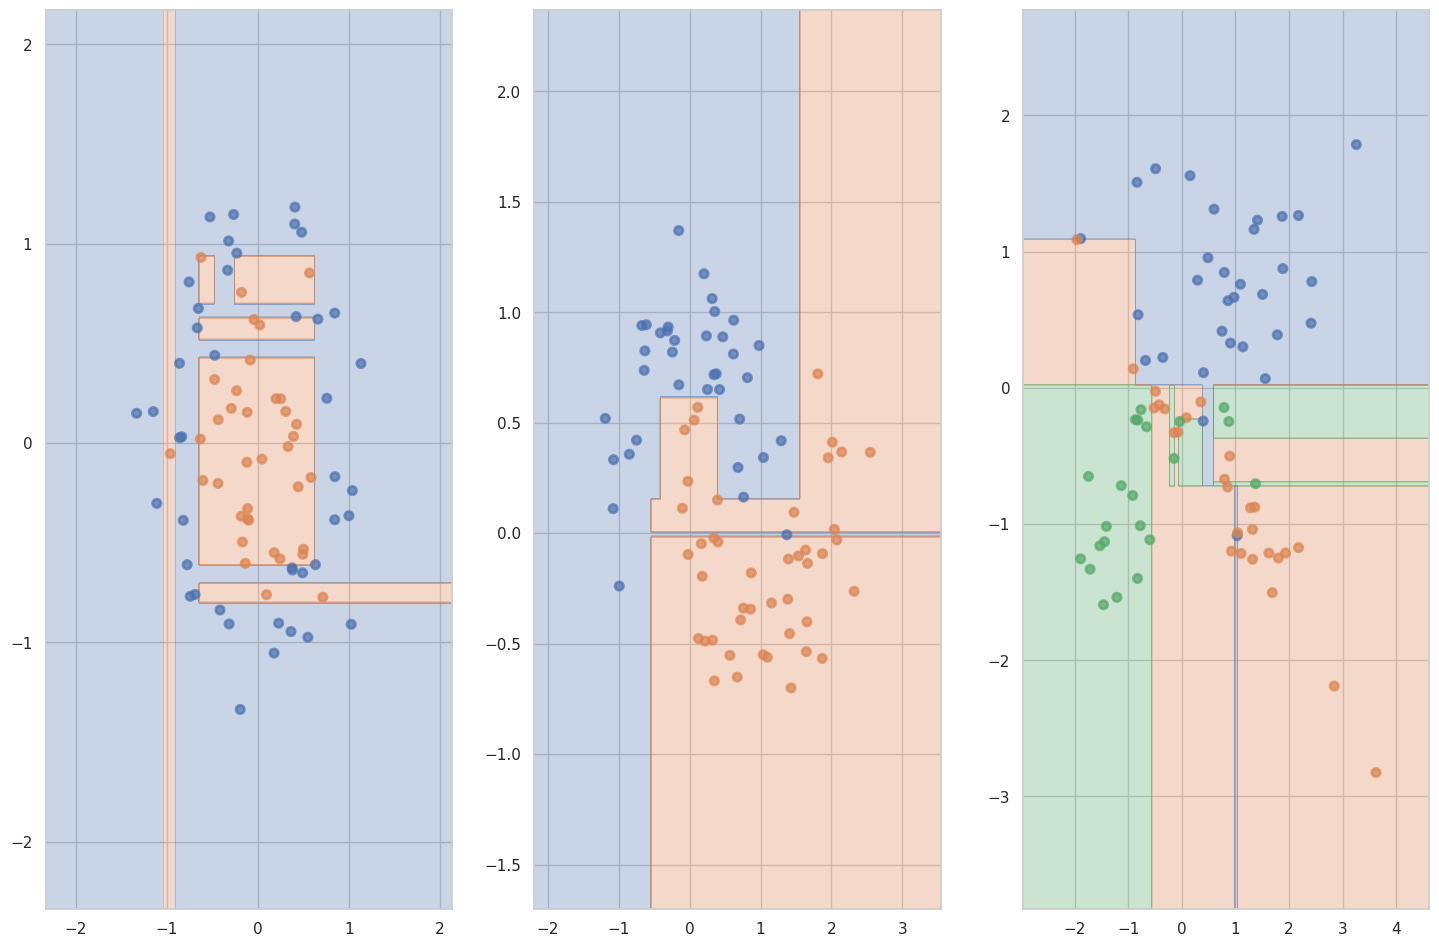

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

models = []

for i, (X, y) in enumerate(train_data):
    model = DecisionTreeClassifier().fit(X, y)
    models.append(model)
    plot_surface(ax[i], model, X, y)

In [9]:
print("acc for train data")
for i, (X, y) in enumerate(train_data):
    print("dataset shape: ", X.shape[0])
    preds = models[i].predict(X)
    print(i, " dataset, acc=", accuracy_score(y, preds))

print("acc for test data")
for i, (X, y) in enumerate(test_data):
    print("dataset shape: ", X.shape[0])
    preds = models[i].predict(X)
    print(i, " dataset, acc=", accuracy_score(y, preds))

acc for train data
dataset shape:  80
0  dataset, acc= 1.0
dataset shape:  80
1  dataset, acc= 1.0
dataset shape:  80
2  dataset, acc= 1.0
acc for test data
dataset shape:  20
0  dataset, acc= 0.75
dataset shape:  20
1  dataset, acc= 0.9
dataset shape:  20
2  dataset, acc= 0.8


Судя по значениям метрики на обучающем наборе деревья переобучились, выдававая нулевую ошибку. Это связано с тем, что по умолчанию дерево разбивается на узлы, пока в вершине не останется ровно один объект.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [10]:
grid_search = [
    [2, 4, 8, 16],
    [1, 3, 5, 7]
]

In [11]:
def plot_surface(ax, clf, X, y, info):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=2, w_pad=2, pad=2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.figure(figsize=(14, 8), dpi=80)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    ax.set_title(info)

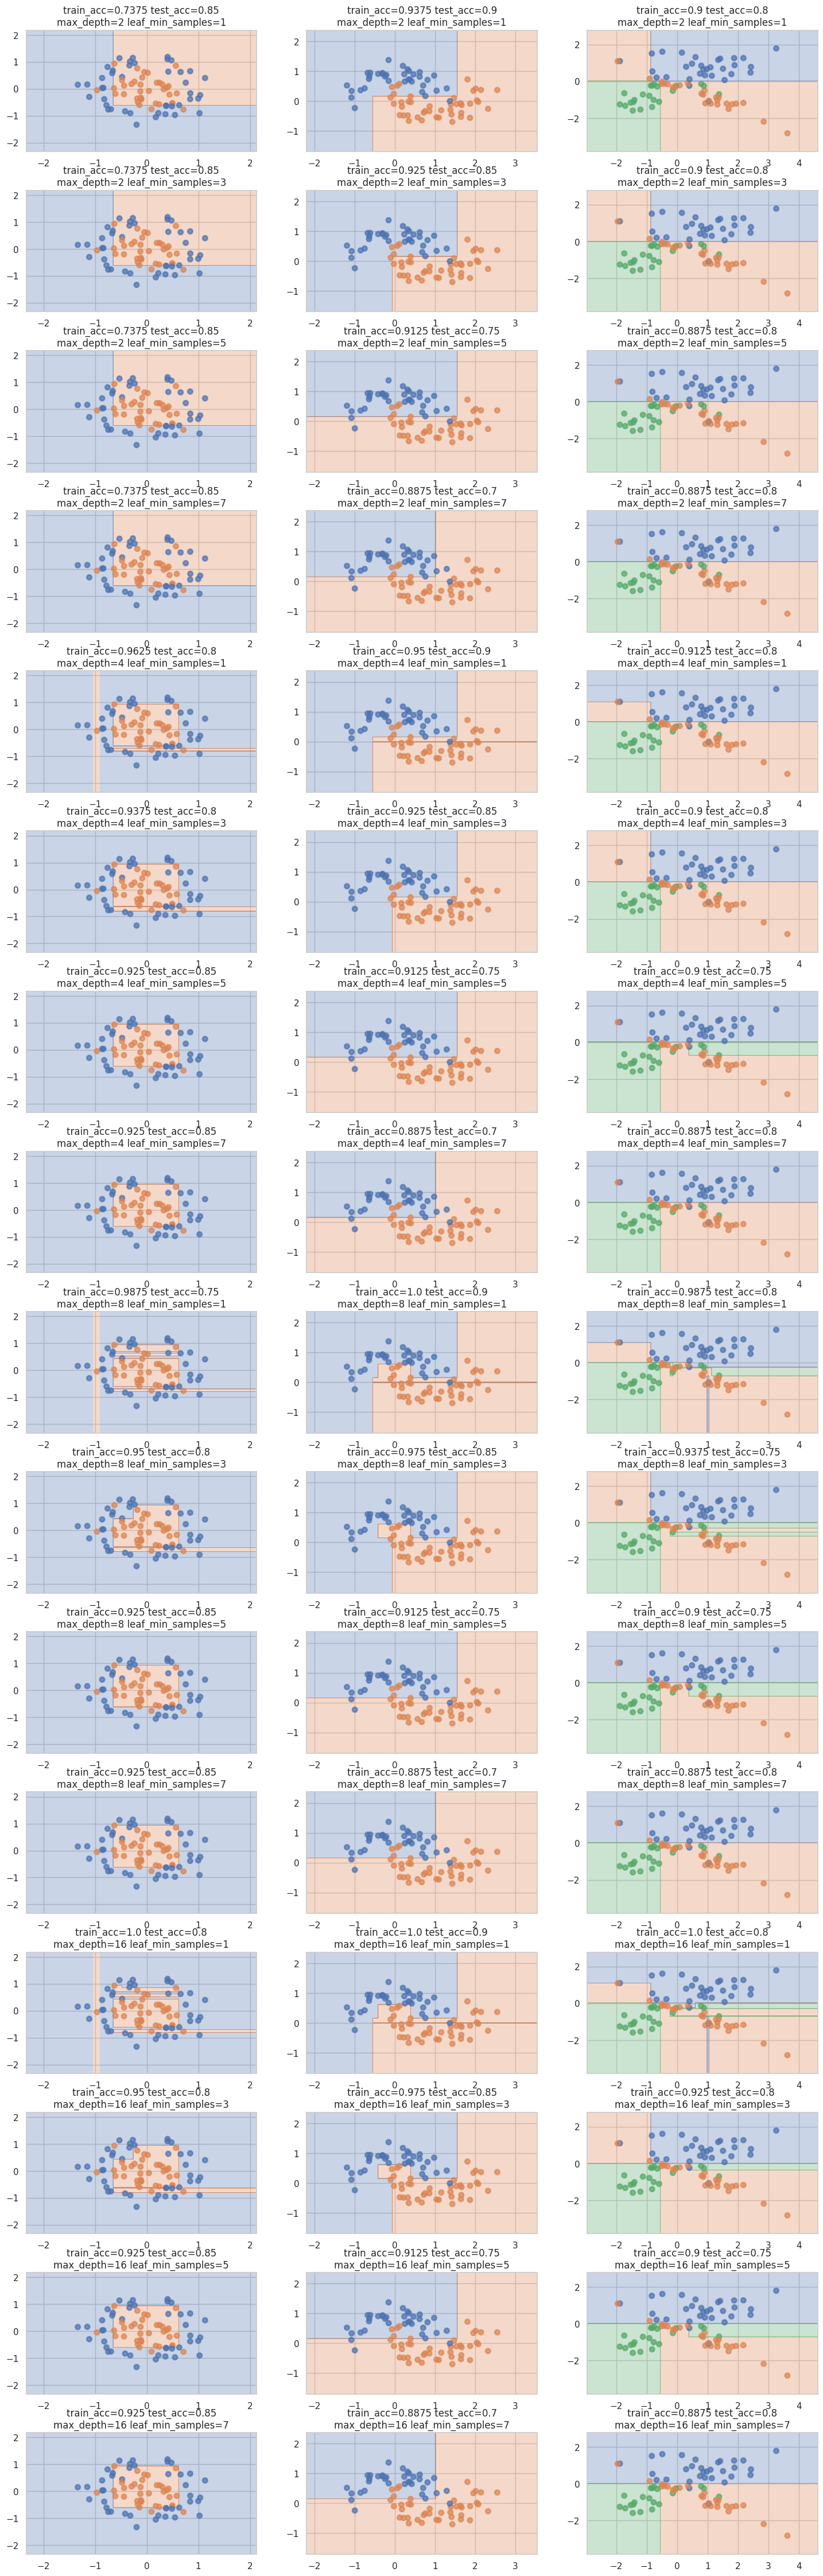

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

<Figure size 1120x640 with 0 Axes>

In [12]:
size = len(grid_search[0]) * len(grid_search[1])

fig, ax = plt.subplots(nrows=size, ncols=3)
fig.set_figheight(45)
fig.set_figwidth(15)

fig.tight_layout(h_pad=10, w_pad=10, pad=10)

j = 0

for depth in grid_search[0]:
    for min_samples in grid_search[1]:
        for i, (X, y) in enumerate(train_data):
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples).fit(X, y)
            train_preds = model.predict(X)
            train_acc = accuracy_score(y, train_preds)
            test_preds = model.predict(test_data[i][0])
            test_acc = accuracy_score(test_data[i][1], test_preds)
            plot_surface(ax[j, i], model, X, y, "train_acc=" + str(train_acc) + " test_acc=" + str(test_acc) + "\n"+
                        "max_depth=" + str(depth) + " leaf_min_samples=" + str(min_samples))
        j += 1

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [32]:
data = pd.read_csv("students.csv")
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [37]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector, min_samples_leaf=None):
    def get_gini(x):
        size = len(feature_vector)
        left_indexes = [i for i in range(len(feature_vector)) if feature_vector[i] < x]
        right_indexes = [i for i in range(len(feature_vector)) if feature_vector[i] >= x]
        left_size = len(left_indexes)
        right_size = len(right_indexes)
        if left_size == 0 or right_size == 0:
            return None
        if min_samples_leaf is not None:
          if left_size < min_samples_leaf or right_size < min_samples_leaf:
            return None
        left_zero_count = (np.array(np.array(target_vector)[left_indexes]) == 0).sum()
        left_ones_count = len(left_indexes) - left_zero_count
        right_zero_count = (np.array(np.array(target_vector)[right_indexes]) == 0).sum()
        right_ones_count = len(right_indexes) - right_zero_count
        h_left = 1 - (left_zero_count / left_size) ** 2 - (left_ones_count / left_size) ** 2
        h_right = 1 - (right_zero_count / right_size) ** 2 - (right_ones_count / right_size) ** 2
        Gini = - (left_size / size) * h_left - (right_size / size) * h_right
        return Gini, x

    sorted_features = sorted(feature_vector)
    n = len(sorted_features)
    thresholds = (np.array(sorted_features[0:(n - 1):1]) + np.array(sorted_features[1:n:1])) / 2
    ginis = []
    thresholds_ = []
    get_ginis = [(ginis.append(get_gini(threshold)), thresholds_.append(threshold)) if get_gini(threshold) != None else None for threshold in thresholds]
    ginis_values = [value[0] for value in ginis]
    optimal_gini, optimal_threshold = max(ginis, key=lambda item: item[0])
    return thresholds_, ginis_values, optimal_threshold, optimal_gini

    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    pass


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None, feature_subset=False):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._depth = 0
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._feature_subset = feature_subset
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth):
        if (self._max_depth is not None) and (depth == self._max_depth):
          node["type"] = "terminal"
          node["class"] = Counter(sub_y).most_common(1)[0][0]
          return

        if(self._min_samples_split is not None) and (sub_X.shape[0] < self._min_samples_split):
          node["type"] = "terminal"
          node["class"] = Counter(sub_y).most_common(1)[0][0]
          return

        cur_depth = depth + 1

        if np.all(sub_y == sub_y.iloc[0]):
            node["type"] = "terminal"
            node["class"] = sub_y.iloc[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        m = sub_X.shape[1]

        if self._feature_subset:
            feature_subset = np.random.choice(m, int(np.sqrt(m)))
        else:
            feature_subset = range(m)

        for feature in feature_subset:
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[sub_X.columns[feature]]
            elif feature_type == "categorical":
                data = sub_X[sub_X.columns[feature]]
                counts = Counter(data)
                clicks = Counter(data[sub_y == 1])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], data)))
            else:
                raise ValueError

            if len(np.unique(feature_vector)) < 2:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y, min_samples_leaf=self._min_samples_leaf)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              list(filter(lambda x: x[1] < threshold, categories_map.items()))))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], cur_depth)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], cur_depth)

    def _predict_node(self, x, node):
        while node["type"] != "terminal":
            feature = node["feature_split"]
            if self._feature_types[feature] == "real":
                if x[feature] < node["threshold"]:
                    node = node["left_child"]
                else:
                    node = node["right_child"]
            else:
                if x[feature] in node["categories_split"]:
                    node = node["left_child"]
                else:
                    node = node["right_child"]
        return node["class"]

    def fit(self, X, y):
        self._fit_node(X, y, self._tree, 0)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

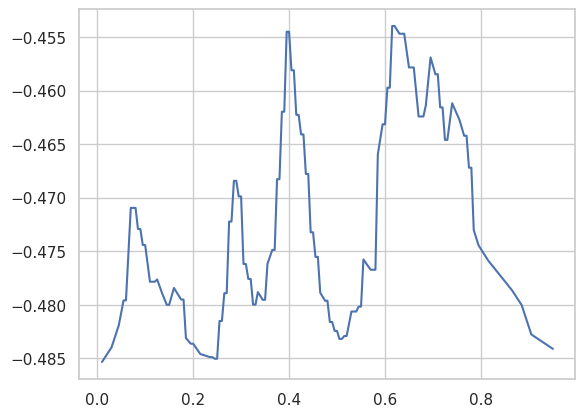

In [33]:
thresholds, ginis = [], []

for feature in list(data.columns)[:5]:
  feature_vector = data[feature]
  target_vector = data["UNS"]
  _thresholds, _ginis, _, _ = find_best_split(feature_vector, target_vector)
  thresholds.append(_thresholds)
  ginis.append(_ginis)

plt.plot(thresholds[0], ginis[0])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

data = pd.read_csv("agaricus-lepiota.data")
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
encoded_data = data.apply(encoder.fit_transform)
encoded_data.head()

In [21]:
y = encoded_data[encoded_data.columns[0]]
X = encoded_data.drop(columns=[encoded_data.columns[0]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [38]:
model = DecisionTree(["categorical"] * 22)

model.fit(X_train[:500], y_train[:500])
predictions = model.predict(np.array(X_test))
print("accuracy: ", accuracy_score(np.array(y_test), predictions))

accuracy:  0.9918759231905465


In [46]:
class RandomForest:
    def __init__(self, feature_types, n_estimators=10, criterion=None, max_depth=None, \
        min_samples_split=None, min_samples_leaf=None):
        self._n_estimators = n_estimators
        self._criterion = criterion
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_saples_leaf = min_samples_leaf

    def fit(self, X, y):
        self._trees = [
        DecisionTree(self._feature_types, \
        max_depth=self._max_depth, \
        min_samples_split=self._min_samples_split, \
        min_samples_leaf=self._min_saples_leaf, feature_subset=True) for i in range(self._n_estimators)]
        fitting = [tree.fit(X, y) for tree in self._trees]

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self._trees])
        preds = []
        for pred in range(predictions.shape[1]):
            most_common_class = Counter(predictions[:, pred]).most_common(1)[0][0]
            preds.append(most_common_class)
        return np.array(preds)

In [48]:
model = RandomForest(["categorical"] * 22)

model.fit(X_train[:500], y_train[:500])
predictions = model.predict(np.array(X_test))
print("accuracy: ", accuracy_score(np.array(y_test), predictions))

accuracy:  0.9921221073362876


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: